# Prep And Read

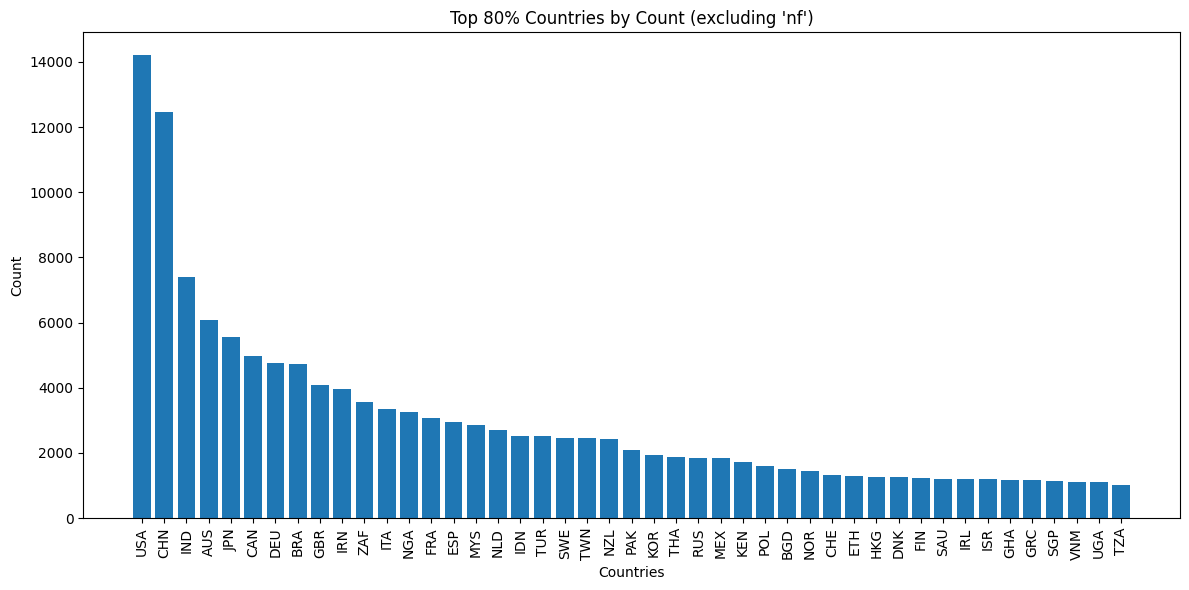

In [10]:
import pandas as pd
import ast 
import matplotlib.pyplot as plt


country_counts = {}

def process_chunk(chunk):
    """Process chunks of data at a time from the csv dataset,
        the function populates the global dict 'country_counts' with each countries and the number 
        of publied papers    
    Args:
        chunk (<class 'pandas.core.frame.DataFrame'>): pandas data frame chunk 
    """
    global country_counts
    for countries_list_str in chunk['countries']:
        # Convert the string representation of the list into an actual list
        try:
            countries_list = ast.literal_eval(countries_list_str)
        except ValueError:
            continue
        
        # Update the country counts/skipping 'nf'(not found) 
        for country in countries_list:
            if country == 'nf':
                continue 
            
            if country in country_counts:
                country_counts[country] += 1
            else:
                country_counts[country] = 0 

chunk_size = 10000
chunks = pd.read_csv('./results_completed.csv', usecols=['countries'], chunksize=chunk_size)

for chunk in chunks:
    process_chunk(chunk)

sorted_countries = sorted(country_counts.items(), key=lambda x: x[1], reverse=True)

total_count = sum([count for _, count in sorted_countries])


cumulative_count = 0
top_countries = []
for country, count in sorted_countries:
    cumulative_count += count
    top_countries.append((country, count))
    # Stop when 80% of the total count
    if cumulative_count / total_count >= 0.80:
        break  

top_countries_names = [country for country, count in top_countries]
top_countries_counts = [count for country, count in top_countries]


plt.figure(figsize=(12, 6))
plt.bar(top_countries_names, top_countries_counts)
plt.title("Top 80% Countries by Count (excluding 'nf')")
plt.xlabel("Countries")
plt.ylabel("Count")
# Rotate x labels for better readability
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


In [8]:
print(country_counts)

{'IND': 7390, 'IRN': 3950, 'JPN': 5567, 'TUR': 2531, 'AUS': 6067, 'CAN': 4967, 'NZL': 2428, 'TWN': 2452, 'CHN': 12478, 'USA': 14198, 'NGA': 3252, 'KEN': 1725, 'NOR': 1441, 'SWE': 2468, 'NLD': 2697, 'RWA': 312, 'GBR': 4086, 'ETH': 1307, 'DEU': 4755, 'UGA': 1102, 'GNQ': 23, 'BRA': 4736, 'IDN': 2532, 'KAZ': 253, 'PAK': 2095, 'MKD': 181, 'GHA': 1171, 'HTI': 208, 'DNK': 1258, 'ISR': 1191, 'HKG': 1270, 'GRC': 1169, 'OMN': 221, 'MYS': 2860, 'POL': 1603, 'SVK': 242, 'SGP': 1124, 'BGR': 368, 'ITA': 3338, 'CHE': 1334, 'ZAF': 3577, 'LBN': 276, 'PRT': 993, 'GRL': 124, 'BGD': 1495, 'RUS': 1841, 'TGO': 175, 'SRB': 415, 'KOR': 1941, 'EGY': 1026, 'SSD': 59, 'PRK': 167, 'MEX': 1840, 'MNG': 146, 'NPL': 873, 'TLS': 58, 'FRA': 3071, 'IRL': 1200, 'MNE': 46, 'BEN': 154, 'ZMB': 421, 'AFG': 508, 'BWA': 212, 'HUN': 668, 'COL': 711, 'PAN': 185, 'SAU': 1207, 'ARE': 189, 'IRQ': 745, 'BEL': 928, 'VNM': 1116, 'LKA': 625, 'ARG': 976, 'CHL': 769, 'PER': 643, 'PRI': 226, 'HRV': 517, 'AUT': 729, 'BHR': 100, 'LBY': 175,